# Project Monte Carlo

### Initiation

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import beta 
import scipy.stats as sps
import sympy as sp

lets start by simulating the geometric brownian mouvement

In [161]:
#Defining the brownian motion :
def BM(N,dt): 
    W = np.zeros(N)
    for i in range(N-1):
        dW = np.sqrt(dt[i])* np.random.randn(1)
        W[i+1] = W[i] + dW        #Brownian path
    return W

def GBM(X_0, sigma, W, N, t):
    X = []
    X.append(X_0)     
    for i in range(1,N):
        Xi = X_0 * np.exp(sigma * W[i]  + (-0.5 * sigma**2) *t[i])
        X.append(Xi)   
    return X


X_0= 104.6
sigma = 0.2 
N = 3 #number of steps
dt = np.array([1, 5])  
W = BM(N,dt)
t2 = 6   
t = np.array([0, 1, 6])

#the brownian motion is. :
s=GBM(X_0,sigma,W,N,t)
sb

[104.6, 74.76116940793952, 32.626922357701844]

In [ ]:
X2_res=X2
X1_res=X1
X0 = np.repeat(X0, N_i*M)
X1 = np.repeat(X1, N_i)
X2 = X2.flatten()
X0 = X0[:, np.newaxis]
X1 = X1[:, np.newaxis]
X2 = X2[:, np.newaxis]
Matrix = np.concatenate((X0, X1, X2), axis=1)



plt.plot(t, Matrix.T)
plt.title("X Simulation, M = {0} , N_i={1}".format(M,N_i))
X2=X2_res
X1=X1_res

In [182]:
#Creating W and X

t = np.array([0, 1, 6])
X0 = 104.6
sigma = 0.2
dt = [1, 5]
M = 100
N_i = 2000


W1 = np.zeros(M)
W2 = np.zeros(N_i)
X1 = np.zeros(M)
X2 = np.zeros((M,N_i))

# gaussian
g = np.random.randn(M)
# brownian
dW = np.sqrt(dt[0]) * g
# Brownian trajectory
W1 = W1 + dW
X1 = X0 * np.exp(sigma * W1 - sigma**2*t[1]/2)
for i in range(M):
    g = np.random.randn(N_i)
    dW = np.sqrt(dt[1]) * g
    W2 = W1[i] + dW
    X2[i,:] = X0 * np.exp(sigma * W2 - sigma**2*t[2]/2)
    


In [183]:
#Simulate Q


In [184]:

q_0=100
a=2.36
b=4.15
c = 7.76

B=np.random.beta(a,b,size=(M,N_i))
Q=q_0*(1+B)





In [185]:
#defining f1 and f2

In [186]:
def f1(x):
    return q_0*(x - c)
 
def f2(X2, Q):
    return Q*X2 - 2.5 * c * (q_0+Q)

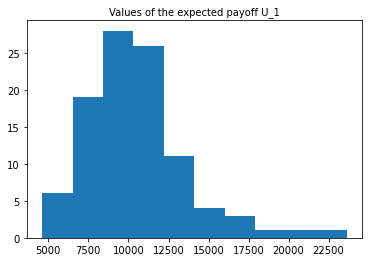

In [187]:
#identifying u1
u1=np.mean(f2(X2, Q),axis=1)

#plotting U_1
plt.hist(u1)
plt.title('Values of the expected payoff U_1', fontsize='10')
plt.show()

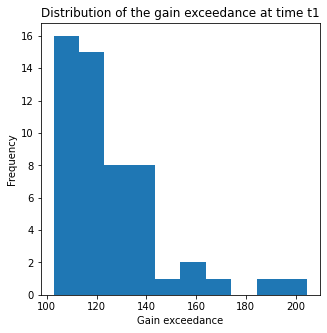

In [188]:


Gain_X1=np.maximum((u1-f1(X1)),0)

# Plotting Gain_X1

plt.figure(figsize=(5,5))
plt.hist(X1[Gain_X1>0])
plt.xlabel('Gain exceedance')
plt.ylabel('Frequency')

plt.title('Distribution of the gain exceedance at time t1', fontsize='12')

plt.show()



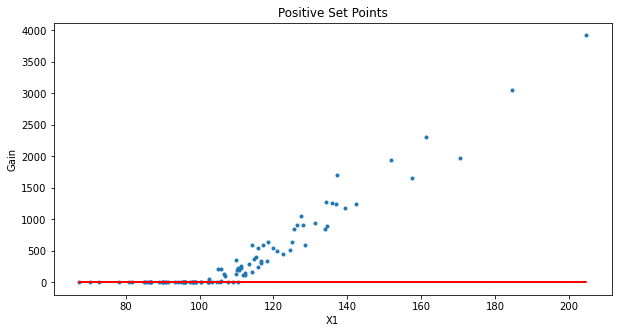

The positive set is given by the following array: 
[115.76641714 151.93727962 109.82469688 102.69435769 139.3945593
 116.711948   127.55931765 124.90608268 105.79705019 111.72092983
 105.7606114  134.08321434 121.03665758 115.20534989 113.49642322
 114.09621954 161.24911176 117.20225793 134.43121656 157.61062885
 118.2093674  204.67410401 170.45215094 142.4605823  111.08736692
 106.56586228 131.21400142 137.07426157 110.38556209 115.74336213
 114.28350426 135.78723498 116.63423118 122.60380448 136.98018197
 124.42551973 184.54024704 118.40599733 107.00499395 112.28731659
 128.50475427 109.99318596 110.21466462 127.95759768 134.15123348
 125.67381257 126.49791697 114.76104891 104.99833308 110.63235875
 120.01422744 111.21983459 112.26452737]


In [189]:
# Plotting positive set points
plt.figure(figsize=(10,5))
plt.scatter(X1,Gain_X1, marker='.')
plt.plot(X1, np.zeros(M), color="red" , label="f1")
plt.title('Positive Set Points', fontsize='12')
plt.xlabel('X1')
plt.ylabel('Gain')

plt.show()
print("The positive set is given by the following array: ")
print(X1[Gain_X1>0])


In [191]:
gain0=Gain_X1.mean()
gain0

400.07546888818155